# Connectome model building
This is the main script for model building, which
 - extracts connectome data
 - creates data-based models
 - visualizes data vs. model

> **IMPORTANT:** This notebook is just an extension and needs to be connected to the `connectome_manipulator.ipynb` kernel!

INFO: Circuit loaded: /gpfs/bbp.cscs.ch/data/scratch/proj83/home/pokorny/circuit-build-S1_v1/sonata/circuit_config_ConnRewireOrd2.json
INFO: Running order-2 data extraction...
Extracting 1-dimensional (22) connection probabilities...


<TIME ELAPSED (data extraction): 0.6s>
INFO: Writing data to ../working_dir/model_building/circuit-build-S1_v1__ConnRewireOrd2/data/ConnProb2ndOrder.pickle
INFO: Running order-2 model building...
MODEL FIT: f(x) = 0.087 * exp(-0.006 * x)
<TIME ELAPSED (model building): 0.0s>
INFO: Writing model to ../working_dir/model_building/circuit-build-S1_v1__ConnRewireOrd2/model/ConnProb2ndOrder.pickle
INFO: Running order-2 data/model visualization...


INFO: Saving /gpfs/bbp.cscs.ch/home/pokorny/JupyterLab/git/connectome_manipulator/notebooks/figures/circuit-build-S1_v1__ConnRewireOrd2/ConnProb2ndOrder/data_vs_model.png...


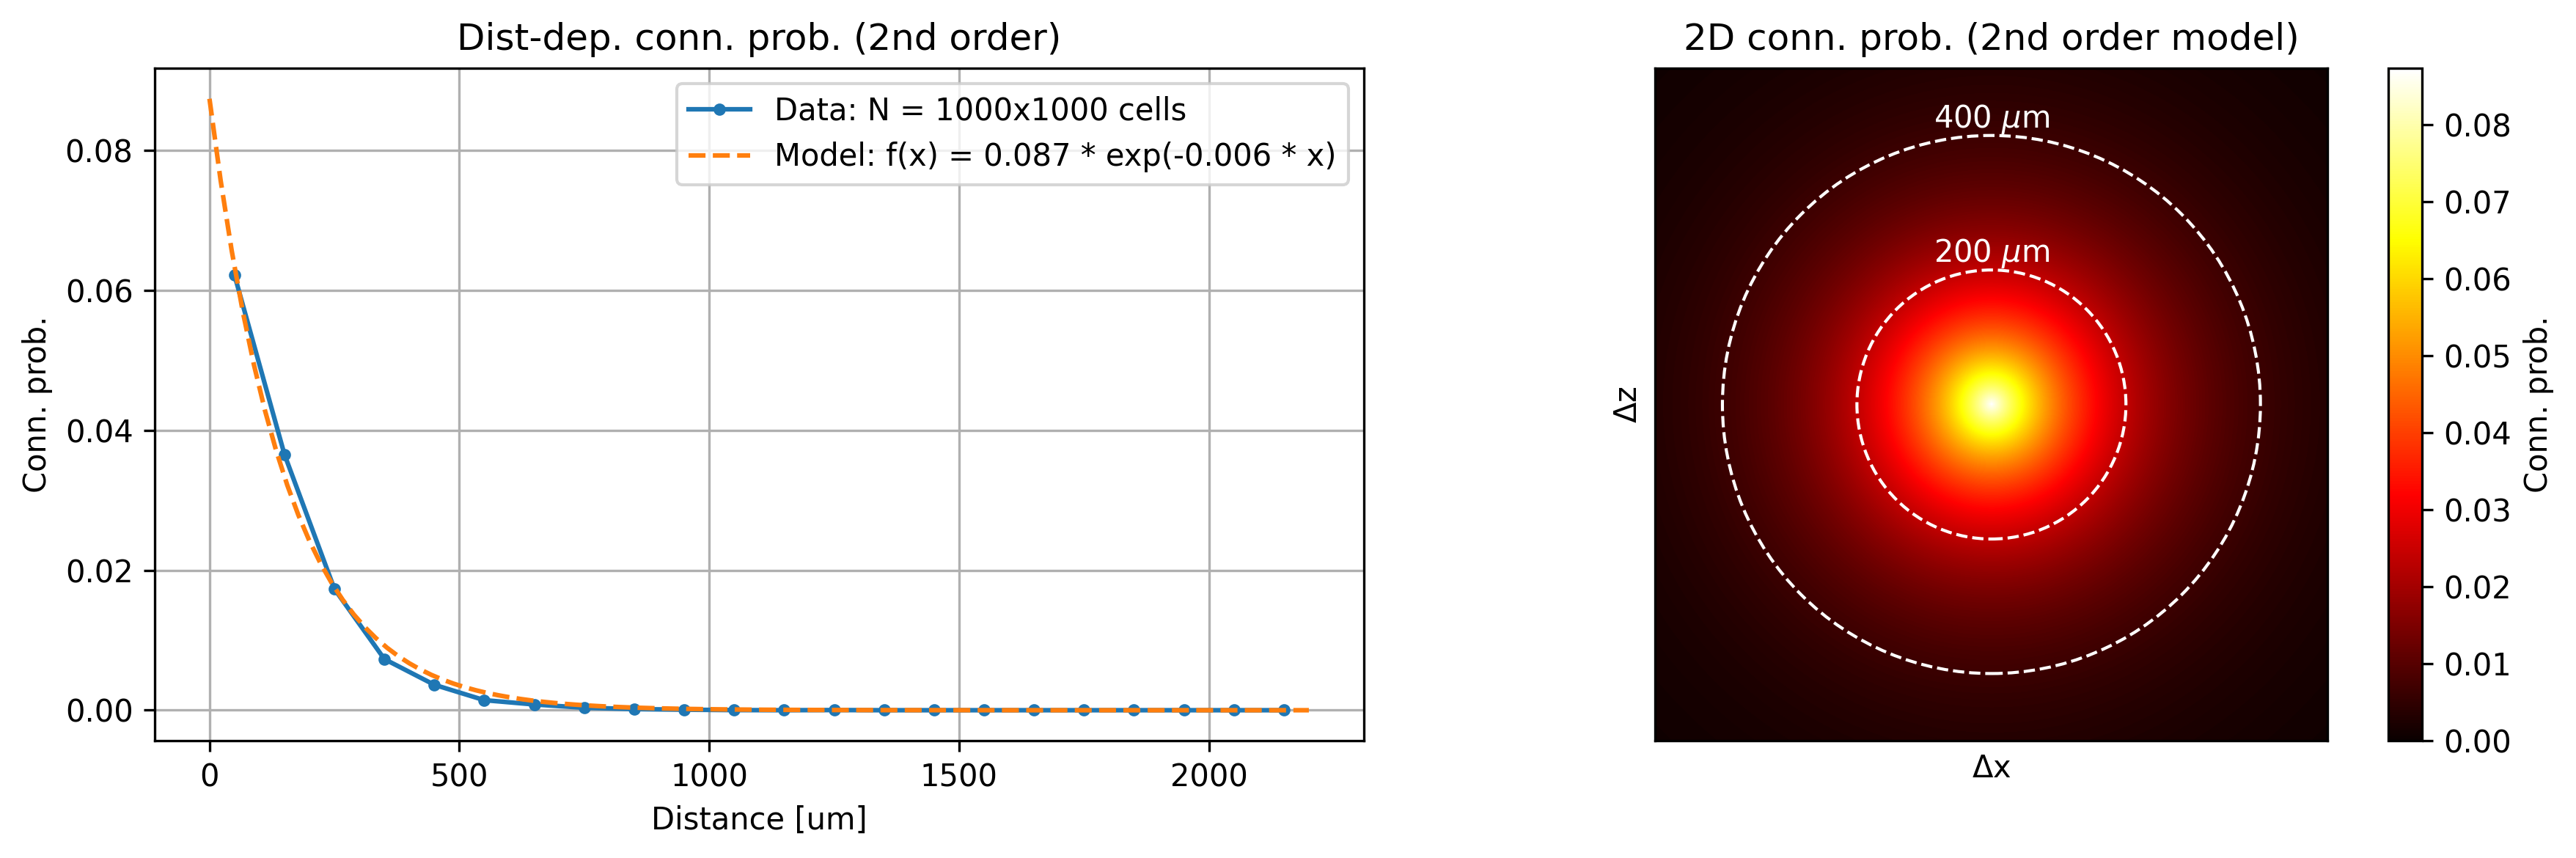

In [5]:
# Model building - Configuration

# circuit_path = '/gpfs/bbp.cscs.ch/data/scratch/proj83/home/pokorny/circuit-build-S1_v1'
# circuit_name = os.path.split(circuit_path)[-1]
# circuit_config = os.path.join(circuit_path, 'sonata', 'circuit_config.json')

circuit_path = manip_config['circuit_path']
circuit_name = f'{os.path.split(circuit_path)[-1]}__{manip_config["manip"]["name"]}'
circuit_config = os.path.join(manip_config['circuit_path'], 'sonata', f'circuit_config_{manip_config["manip"]["name"]}.json')

model_config = {}

""" General settings """
model_config['working_dir'] = os.path.join('..', 'working_dir', 'model_building', circuit_name)
model_config['out_dir'] = os.path.join('figures', circuit_name)
model_config['seed'] = 7531

""" Model specifications """
model_config['circuit_config'] = circuit_config
# model_config['model'] = {'name': 'DistDepDelay', 'fct': {'source': 'delay', 'kwargs': {'sample_size': 1000, 'bin_size_um': 100, 'max_range_um': None}}}
# model_config['model'] = {'name': 'ConnProb1stOrder', 'fct': {'source': 'conn_prob', 'kwargs': {'order': 1, 'sample_size': 1000}}}
model_config['model'] = {'name': 'ConnProb2ndOrder', 'fct': {'source': 'conn_prob', 'kwargs': {'order': 2, 'sample_size': 1000, 'bin_size_um': 100, 'max_range_um': None}}}
# model_config['model'] = {'name': 'ConnProb3rdOrder', 'fct': {'source': 'conn_prob', 'kwargs': {'order': 3, 'sample_size': 1000, 'bin_size_um': 100, 'max_range_um': None}}}
# model_config['model'] = {'name': 'ConnProb4thOrder', 'fct': {'source': 'conn_prob', 'kwargs': {'order': 4, 'sample_size': 2000, 'bin_size_um': 40, 'max_range_um': 500, 'n_estimators': 500, 'max_depth': None}}}

# Model building - Run
model_building.main(model_config, True, force_recomp=True)